# How to: Generate HeatMaps of a single molecule (SMILES-string)

In [ ]:
import sys
from pathlib import Path

notebook_dir = Path().resolve()
target_path = notebook_dir.parent.parent / 'ml-xai'
sys.path.append(str(target_path))

from WISP.plotting_helper import generate_heatmap
from WISP.atom_attributor import *

# Import the get_feature_function if it is available in the WISP package
from WISP.ml_helper import get_RDK_fingerprint

import pickle
import numpy
import pandas as pd

### Loading the pre-trained model file, prepare the SMILES input and define a unique identifier for the heatmap plot

Why do we need all that stuff?:  

* model: To predict on the mutated SMILES-strings.  
* smiles: Defines the SMILES-string (It is absolutely crucial, that the SMILES are defined as a bare string).  
* Identifier: Naming the HeatMap file.  

<br>
If you want to get the Heatmaps of multiple SMILES-strings, you need to manually loop over the `attribute_atoms` with a list of SMILES-strings.  

In [ ]:
model = pickle.load(open('output/model.pkl', 'rb'))

# 2,5-Piperidinedione, E1-CC2: 0.16466883
new_smiles = 'N1C(=O)CCC(=O)C1'
new_smiles_ID = '2_4_Piperidinedione'

### Generating the individual atom attributions  

`attribute_atoms` requires the following arguments:  
* smiles (str): SMILES string of the molecule.
* model: A fitted estimator with `.predict(X)`.
* feature_method (callable): Function mapping a SMILES to its feature vector(s).  

After the atom-wise attributions are calculated, they will be saved as a pandas.DataFrame alongside the SMILES and the Identifier. The DataFrame can then be fed into `generate_heatmap`.

In [15]:
# Generating the atom_attributions 
attribute_out = attribute_atoms(new_smiles, model, get_RDK_fingerprint)

# We then save the attributions in a new Dataframe, that can be fed into 'generate_heatmaps' (Dataframe shown in the output)
# Index of the resulting one and only column is 0 :)
new_data = pd.DataFrame([{
   'smiles':    new_smiles,
   'smiles_ID': new_smiles_ID,
   'attr_data': attribute_out
}])
new_data

,smiles,smiles_ID,attr_data
0,N1C(=O)CCC(=O)C1,2_4_Piperidinedione,"[0.00593684777059883, -0.009497002634350403, 0..."


### Lastly, call `generate_heatmap` to visualize the atom-wise attributions as a HeatMap.  

`generate_heatmap` requires the following arguments:  
* data (pd.DataFrame): Must contain columns `smiles_column` (SMILES string), `attribution_column` (list of floats per atoms) and `id_column` (unique identifier).  
* index (int): Row index in `data` to plot.
* output_dir (str): Directory where PNGs will be written.
* smiles_column (str): Name of the SMILES column in `data`.
* attribution_column (str): Name of the attribution‐list column in `data`.
* id_column (str): Name of the ID column for naming the output file.
* task_type (str): Either 'regression' or 'classification'; controls color scale.  

Inside the defined output directory the *.png* files will be saved:
* `smiles_ID.png` -> The visualization of the atom-wise attributions to the models prediction.
* `attr_data_Legend.png` -> The color scale for the HeatMap.  

<br>
The HeatMap can also be visualized directly when printing out the variable.

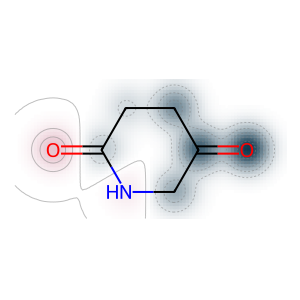

In [ ]:
# As we trained a regression model the task_type needs to be a regression as well
task_type = 'regression'

# Use the 'generate_heatmap' function to visulize the attribution of the individual atoms
heatmap = generate_heatmap(new_data, 0, 'output/', 'smiles', 'attr_data', 'smiles_ID', task_type)

# Visualization of the heatmap
heatmap